In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df=pd.read_csv('Height-Weight Data - Height-Weight Data.csv')
df.head()
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df.shape #print total row and column

(3501, 2)

In [3]:
row, col= df.shape

In [4]:
row

3501

In [5]:
col

2

In [6]:
df[50:60] #print specific row and column

,height,weight
50,64.782583,165.611626
51,70.183550,201.071918
52,68.491450,173.423960
53,67.330831,181.407679
54,66.990944,169.737707
55,66.499550,163.309528
56,68.353057,189.710210
57,70.774459,192.124847
58,71.215924,198.198464
59,70.013365,209.526500


Text(0.5, 1.0, 'Height and Weight')

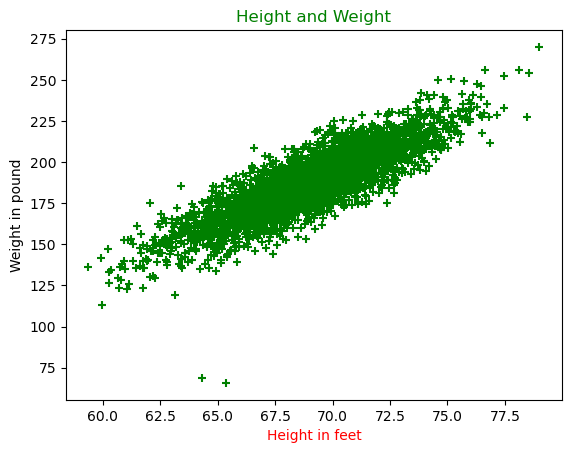

In [7]:
#ploting the dataframe in a graph
plt.scatter(df[['height']] , df[['weight']],color='green',marker='+')
plt.xlabel('Height in feet',color='red') #for labeling
plt.ylabel('Weight in pound',color='black')
plt.title('Height and Weight',color='green')

In [8]:
df.height.mean() 

69.02441087268797

In [9]:
df.weight.mean()

186.89125797946284

In [10]:
x=df.drop('weight',axis=1)
x.head()

y=df[['weight']]
y.head()


,weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [11]:
#for split the dataset into train and test points
from sklearn.model_selection import train_test_split as tts
xtest,xtrain,ytest,ytrain=tts(x,y,test_size=0.33,random_state=1)

In [12]:
xtrain.head()

,height
719,67.402821
2296,69.560033
3083,65.809912
1296,67.687531
2234,65.077902


In [13]:
ytrain.head()

,weight
719,192.672676
2296,187.491501
3083,191.563495
1296,177.909685
2234,165.313807


In [14]:
xtest.head()

,height
166,66.262820
1011,71.738695
1344,67.750330
1563,71.690869
476,68.515523


In [15]:
ytest.head()

,weight
166,162.779583
1011,185.842622
1344,179.115883
1563,188.656335
476,176.141239


In [16]:
#import regression library
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit( xtrain, ytrain) #training model


LinearRegression()

In [17]:
reg.predict([[71.738695]])

array([[203.43932724]])

In [18]:
m = reg.coef_
m

array([[5.98160525]])

In [19]:
c = reg.intercept_
c

array([-225.67322707])

In [20]:
predicted= (m*71.738695) + c
predicted

array([[203.43932724]])

In [21]:
reg.predict(xtest)

array([[170.68480486],
       [203.43932587],
       [179.58250152],
       ...,
       [228.92851467],
       [196.3603891 ],
       [194.65034368]])

In [22]:
df2= df.copy()
df2.head()

,height,weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [23]:
df2['predicted']=reg.predict(df[['height']])
df2.head()

,height,weight,predicted
0,73.847017,241.893563,216.050477
1,68.781904,162.310473,185.752971
2,74.110105,212.740856,217.624168
3,71.730978,220.042470,203.393170
4,69.881796,206.349801,192.332090


# Best Fit Line

Text(0.5, 1.0, 'Height and Weight')

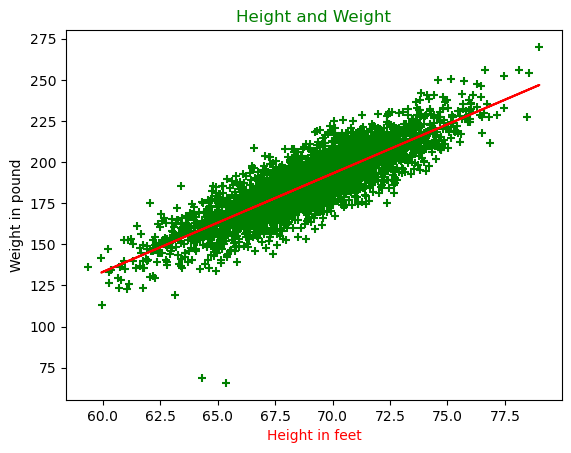

In [24]:
plt.scatter(df[['height']] , df[['weight']],color='green',marker='+')
plt.plot(xtest,reg.predict(xtest),color='red')
plt.xlabel('Height in feet',color='red')
plt.ylabel('Weight in pound',color='black')
plt.title('Height and Weight',color='green')

# Finding Errors

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
#test MSE
test_mse=mean_squared_error(ytest,reg.predict(xtest))
test_mse

103.71466938495638

In [26]:
#train MSE
train_mse=mean_squared_error(ytrain,reg.predict(ytrain))
train_mse

509251.7827103566

In [27]:
#test MAE

test_mae=mean_absolute_error(ytest,reg.predict(xtest))
test_mae

7.974742466588659

In [28]:
#train MAE
train_mae=mean_absolute_error(ytrain,reg.predict(xtrain))
train_mae

8.294306862668957